## CS 457 - Homework Assignment 10: Clustering
### Fahad Ahmed Shaikh
#### fs05847@st.habib.edu.pk

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('C:/Users/HP/OneDrive/Desktop/dataSci/hw10/McDonaldsMenu.csv')
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


### Q1

In [3]:
df1 = df.drop(['Category',"Item"],axis=1)

### Dropped all the columns that have classes

### Q2

In [4]:
df2 = df1.drop('Serving Size',axis=1)

### Q3

In [5]:
scaler = MinMaxScaler()
# transform data
df3 = scaler.fit_transform(df2)
# df[1:15]

#### All the data is now scaled (normalize).

### Q4

In [6]:
wss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, max_iter = 300, random_state = 99)
    kmeans.fit(df3)
    wss.append(kmeans.inertia_)

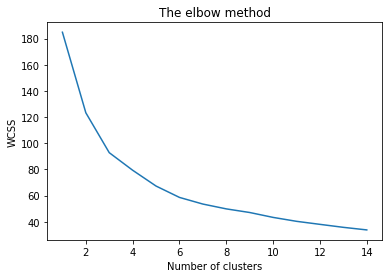

In [7]:
plt.plot(range(1, 15), wss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### As we can see from the graph above the optimal number of clusters is 6. The graph decreases rapid after cluster 3 but it gets steady/smooth decline after cluster 6.
### optimal number of clusters = 6

### Q5

In [8]:
# optimal number of clusters = 6
kmeans = KMeans(n_clusters = 6, max_iter = 300, random_state = 99)
Y = kmeans.fit_predict(df3)

In [9]:
Y

array([2, 2, 2, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 2, 2,
       5, 5, 5, 5, 5, 1, 1, 5, 5, 1, 1, 1, 1, 2, 2, 2, 3, 2, 2, 2, 5, 5,
       5, 5, 5, 5, 2, 2, 5, 5, 5, 5, 5, 5, 5, 2, 2, 5, 5, 5, 2, 5, 5, 2,
       2, 5, 2, 2, 5, 5, 5, 2, 5, 2, 2, 2, 3, 3, 2, 5, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 0, 0, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 4, 0, 0, 0, 0, 0, 4,
       0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 3, 2, 2, 3, 3, 0, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 0, 4, 0])

## As we can see from the array that there are 6 clusters. The first element is 3rd cluster. The last element is 1st cluster. The 4th element is the last (6th) cluster.

### Q6

Text(0.5, 1.0, 'The dataset post clustering')

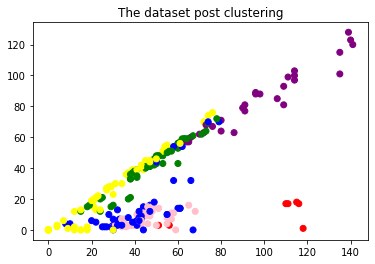

In [10]:
color2=np.array(['green','red','blue',"yellow","purple","pink"])
plt.scatter(x=df2.Carbohydrates,y=df2.Sugars,c=color2[kmeans.labels_])
plt.title("The dataset post clustering")

## As we can see there are 6 clusters each with different color. some clusters are separeted while some are geting mix.
For example YelloW and Green are mixing at some point. While as we see that most of the Purple clusters are separeted.

### Q7

In [11]:
C1 = df2.iloc[Y == 0, :]
C2 = df2.iloc[Y == 1, :]
C3 = df2.iloc[Y == 2, :]
C4 = df2.iloc[Y == 3, :]
C5 = df2.iloc[Y == 4, :]
C6 = df2.iloc[Y == 5, :]

In [12]:
C1['Calories'].mean()

303.3333333333333

In [13]:
C2['Calories'].mean()

1100.0

In [14]:
C3['Calories'].mean()

350.8333333333333

In [15]:
C4['Calories'].mean()

127.10144927536231

In [16]:
C5['Calories'].mean()

633.3333333333334

In [17]:
C6['Calories'].mean()

548.695652173913

### Q8

## As we can see from the above that C2 has highest value so its high calory item, it is for the person who wants high calories in their diet
## C4 has very low value so it contains very low calories, it is for the person who wants low calories in their diet
## C6 is the item that moderate calories so person who wants balance diet so he/she should chose C6 item

## Q9

### C2 = DeathWish burger (becuase it contains very high calories)
### C5 = GymLover (becuase it contains high calories to gain mass)
### C6= BalancedCalorized
### C4 = NoCalory
### C1= LowEnergy